**Question 1**

In [0]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import time

In [0]:
start = time.clock()

x = 0.6                      # initial value of x
y = 0.25                     # initial value of y
learn_rate = 0.015

w = np.array([x,y])
w_x = []
w_y = []
f = []

while (w[0]+w[1]<1) and (w[0]>0) and (w[1]>0):
  energy = - np.log(1-w[0]-w[1]) - np.log(w[0]) - np.log(w[1])
  f.append(energy)
  w_x.append(w[0])
  w_y.append(w[1])

  grad_x = 1/(1-w[0]-w[1]) - 1/(w[0])
  grad_y = 1/(1-w[0]-w[1]) - 1/(w[1])
  gradient = np.array([grad_x, grad_y])

  correct = learn_rate * gradient

  if np.linalg.norm(w - np.subtract(w, correct)) < 0.001:   # to avoid inifinite loop
    break
  else:
    w = np.subtract(w, correct)

end = time.clock()
print ("time for gradient descent: ", round((end-start), 4))

time for gradient descent:  0.0025


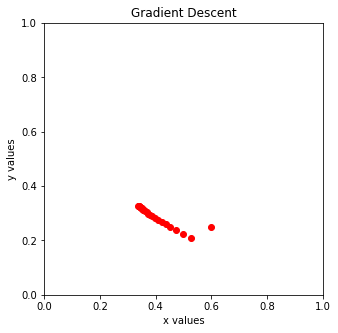

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(w_x, w_y, c = 'red')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('y values')
plt.xlabel('x values')
plt.title('Gradient Descent')
plt.show()

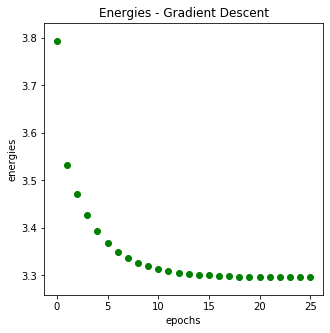

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(range(len(f)), f, c = 'green')
plt.ylabel('energies')
plt.xlabel('epochs')
plt.title('Energies - Gradient Descent')
plt.show()

In [0]:
start = time.clock()

x = 0.75
y = 0.19
learn_rate = 1

w = np.array([x,y])

w_x = []
w_y = []
f = []

while ((w[0]+w[1]<1)) and (w[0]>0) and (w[1]>0):
  energy = - np.log(1-w[0]-w[1]) - np.log(w[0]) - np.log(w[1])
  f.append(energy)

  w_x.append(w[0])
  w_y.append(w[1])

  grad_x = 1/(1-w[0]-w[1]) - 1/(w[0])
  grad_y = 1/(1-w[0]-w[1]) - 1/(w[1])
  gradient = np.array([grad_x, grad_y])

  hess_x = 1/((1-w[0]-w[1])*(1-w[0]-w[1])) + 1/(w[0]*w[0])
  hess_y = 1/((1-w[0]-w[1])*(1-w[0]-w[1])) + 1/(w[1]*w[1])
  hess_xy = 1/(1-w[0]-w[1]) * (1-w[0]-w[1])
  hessian = np.array([[hess_x, hess_xy],[hess_xy, hess_y]])

  correct = learn_rate * np.matmul(inv(hessian), gradient)
  if np.linalg.norm(w - np.subtract(w, correct)) < 0.00001:
    break
  else:
    w = np.subtract(w, correct)

end = time.clock()
print ("time for Newton's Method: ", round((end-start), 4))

time for Newton's Method:  0.015


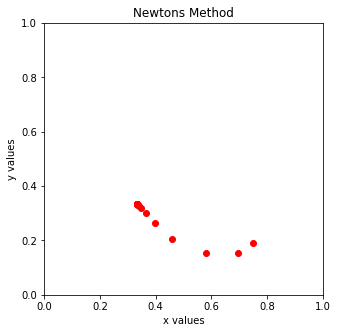

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(w_x, w_y, c = 'red')
plt.ylim([0,1])
plt.xlim([0,1])
plt.ylabel('y values')
plt.xlabel('x values')
plt.title('Newtons Method')
plt.show()

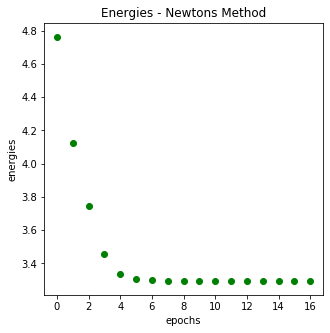

In [0]:
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(range(len(f)), f, c = 'green')
plt.ylabel('energies')
plt.xlabel('epochs')
plt.title('Energies - Newtons Method')
plt.show()

As per the book Newton's method is faster then Gradient descent. But in this case it is slower. The convergence time will change according to the function. 
Newtons method has inverse quadratic convergence and Gradient descent has inverse linear convergence. 

**Question 2**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
x = []
y = []
for i in range(50):
  x_temp = i + 1
  u = np.random.uniform(-1,1)
  y_temp = i + 1 + u
  x.append(x_temp)
  y.append(y_temp)

In [0]:
# to optimize the wo and w1 values
x_temp = np.linalg.inv(np.matmul(np.array([np.ones(50),x]), np.transpose(np.array([np.ones(50), x]))))
x_transpose = np.transpose(np.array([np.ones(50), x]))
x_pseudo_inv = np.matmul(x_transpose, x_temp)
w = np.matmul(np.array(y), x_pseudo_inv)
print(w)

[0.10001449 0.99962296]


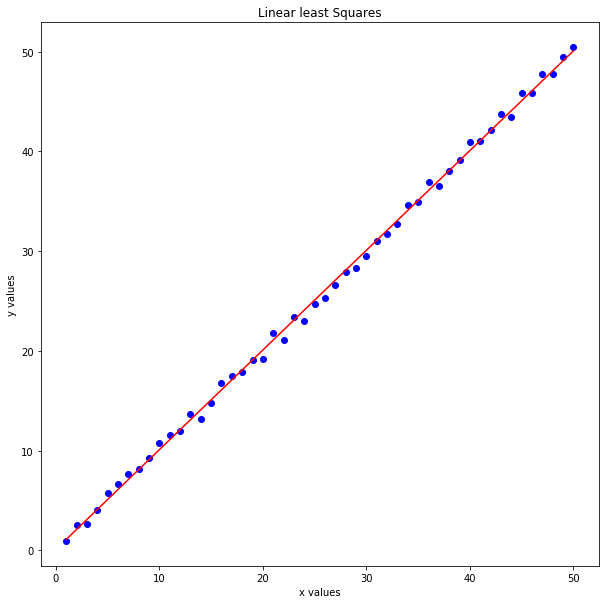

In [0]:
yn = np.polyval([w[1], w[0]], np.array(x))
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x, y, c = 'blue')
plt.plot(x, yn, c = 'red')
plt.ylabel('y values')
plt.xlabel('x values')
plt.title('Linear least Squares')
plt.show()

**Question - 2F**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
x = []
y = []
for i in range(50):
  x_temp = i + 1
  u = np.random.uniform(-1,1)
  y_temp = i + 1 + u
  x.append(x_temp)
  y.append(y_temp)

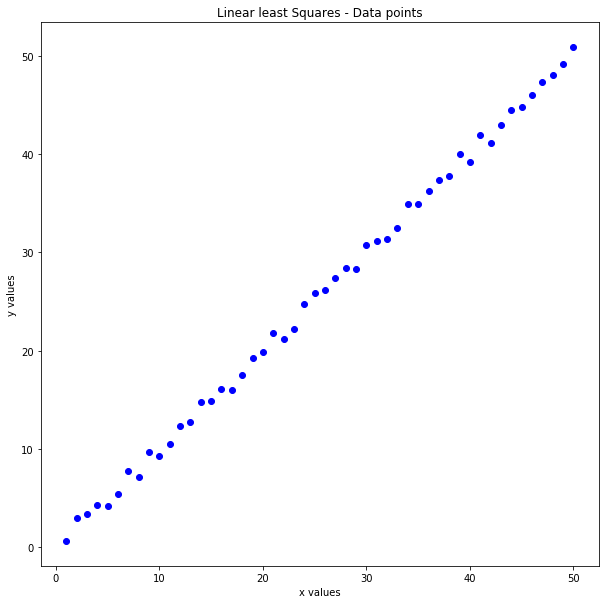

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x, y, c = 'blue')
plt.ylabel('y values')
plt.xlabel('x values')
plt.title('Linear least Squares - Data points')
plt.show()

In [0]:
w1 = 0
w0 = 0

Learn_rate = 0.0001
epochs = 50

n = float(len(x))

for i in range(epochs):
  y_pred = w1*np.array(x) + w0
  Derivative_w1 = (-2/n) * sum(x * (y - y_pred))
  Derivative_w0 = (-2/n) * sum(y - y_pred)
  w1 = w1 - Learn_rate * Derivative_w1
  w0 = w0 - Learn_rate * Derivative_w0

print (w1, w0)

1.0019581287799695 0.02941624626528791


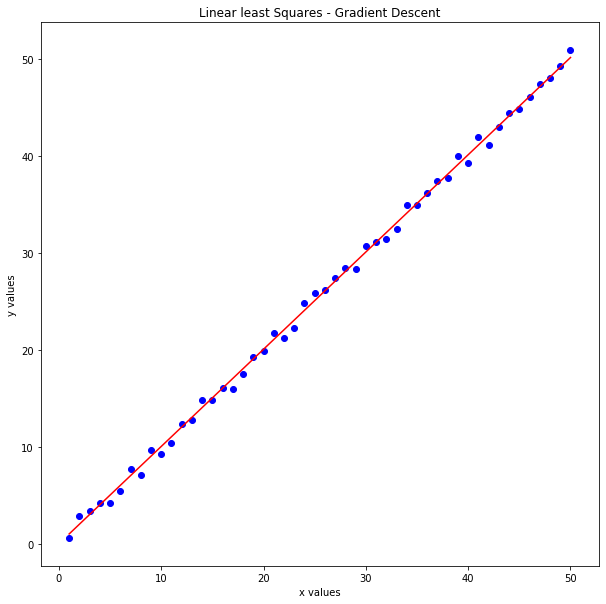

In [0]:
y_pred = w1*np.array(x) + w0

fig, ax = plt.subplots(figsize=(10,10))
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], color = 'red')
plt.scatter(x, y, c = 'blue')
plt.ylabel('y values')
plt.xlabel('x values')
plt.title('Linear least Squares - Gradient Descent')
plt.show()

Gradient Descent classifies the classes more accurately. Without gradient descent the weights would be changing randomly as long as they are satisfying the condition.